# XGBoost Model with Refined Feautures

### We will exclude features that scored less than 20 in the all-features XGBoost training to retain only the most significant features and reduce overall complexity
## Features to Keep:
### Ecliptic Latitude deg (419)
### Galactic Latitude deg (357)
### Galactic Longitude deg (353)
### Ecliptic Longitude deg (350)
### Discovery Year (185)
### Number of Planets (101)
### Number of Photometry Time Series (38)
### Number of Stars (26)
## Features to Exclude:
### Number of Radial Velocity Time Series (17)
### Number of Stellar Spectra Measurements (14)
### Controversial Flag (7)
### Circumbinary Flag (6)

In [1]:
import pandas as pd
composite_preprocessed = pd.read_csv('Composite_preprocessed_NO_MV_BALANCED.csv')
composite_preprocessed.head()

,Number of Stars,Number of Planets,Number of Moons,Galactic Latitude [deg],Galactic Longitude [deg],Ecliptic Latitude [deg],Ecliptic Longitude [deg],Number of Photometry Time Series,Number of Radial Velocity Time Series,Number of Stellar Spectra Measurements,Number of Emission Spectroscopy Measurements,Number of Transmission Spectroscopy Measurements,Circumbinary Flag,Controversial Flag,Discovery Year,Detected by Transits
0,3.094076,-0.666894,0.0,2.424559,1.234306,-0.145901,-0.624689,0.613405,1.731519,-0.261600,-0.012466,-0.044364,0,0,2007,0
1,-0.256668,-0.666894,0.0,1.186720,-0.283545,1.148661,-0.992906,0.613405,0.729626,-0.261600,-0.012466,-0.044364,0,0,2009,0
2,-0.256668,-0.666894,0.0,-0.877523,-0.306068,0.308947,-2.327878,0.613405,0.729626,-0.261600,-0.012466,-0.044364,0,0,2008,0
3,-0.256668,0.216988,0.0,1.382856,-0.669803,0.872499,-0.152934,0.613405,3.735304,0.591749,-0.012466,-0.044364,0,0,2002,0
4,6.444820,-0.666894,0.0,0.261241,-0.531444,1.023143,0.855489,0.613405,3.735304,2.298449,-0.012466,-0.044364,0,0,1996,0


# Remove unimportant features

In [2]:
remove = ['Number of Radial Velocity Time Series',
          'Number of Stellar Spectra Measurements',
          'Controversial Flag',
          'Circumbinary Flag']

composite_unnecessary_removed = composite_preprocessed.drop(remove, axis=1)

# Train Test Split

In [3]:
# we are trying to predict whether an exoplanet has been detected by transits (0 or 1)
targets = composite_unnecessary_removed['Detected by Transits']
# training features are all variables except the targets
features = composite_unnecessary_removed.drop(['Detected by Transits'], axis=1)

## Observe Feature Correlations

In [4]:
features.corr()

,Number of Stars,Number of Planets,Number of Moons,Galactic Latitude [deg],Galactic Longitude [deg],Ecliptic Latitude [deg],Ecliptic Longitude [deg],Number of Photometry Time Series,Number of Emission Spectroscopy Measurements,Number of Transmission Spectroscopy Measurements,Discovery Year
Number of Stars,1.000000,0.109074,NaN,-0.044988,0.104236,-0.087528,-0.069450,0.057734,-0.003200,-0.002096,-0.147575
Number of Planets,0.109074,1.000000,NaN,-0.055511,0.008589,0.026680,-0.023926,-0.002505,0.057797,0.076409,-0.072274
Number of Moons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Galactic Latitude [deg],-0.044988,-0.055511,NaN,1.000000,-0.019213,0.463063,0.174632,-0.090369,-0.025691,-0.008918,0.031820
Galactic Longitude [deg],0.104236,0.008589,NaN,-0.019213,1.000000,-0.657044,-0.408779,0.131333,-0.008283,-0.026088,-0.106558
Ecliptic Latitude [deg],-0.087528,0.026680,NaN,0.463063,-0.657044,1.000000,0.498442,-0.222283,-0.006864,0.025212,0.081113
Ecliptic Longitude [deg],-0.069450,-0.023926,NaN,0.174632,-0.408779,0.498442,1.000000,-0.119612,0.013811,0.031078,0.058041
Number of Photometry Time Series,0.057734,-0.002505,NaN,-0.090369,0.131333,-0.222283,-0.119612,1.000000,-0.004172,-0.014848,-0.252983
Number of Emission Spectroscopy Measurements,-0.003200,0.057797,NaN,-0.025691,-0.008283,-0.006864,0.013811,-0.004172,1.000000,-0.000553,0.000791
Number of Transmission Spectroscopy Measurements,-0.002096,0.076409,NaN,-0.008918,-0.026088,0.025212,0.031078,-0.014848,-0.000553,1.000000,-0.015425


## Split data

In [5]:
# Splitting dataset into training and testing addresses overfitting
# shuffling is necessary to remove dependencies that come from order of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8, random_state = 42)

x_train.shape, y_train.shape

((5148, 11), (5148,))

# Fitting the XGBoost Model

In [6]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# we use logloss (cross-entropy loss) since it measures performance of a classification model where output is probability btwn 0-1
# very suitable for binary classification problems

# logloss penalizes incorrect predictions more strongly than correct ones (penalty increases as predicted probability diverges from actual class label 0 or 1)
# robust metric for binary classification as it considers correctness of predictions and CONFIDENCE of those predictions

# logloss works with probability scores (outputs of models like logistic regression and XGBoost)
# this is useful bc XGBoost outputs probability scores for the positive class, and logloss is a natural way to evaluate these probabilities

# logloss is also continuous and differentiable (Great for optimizing)
# XGBoost uses gradient boosting, logloss provides smooth gradient for updates 

xgb_model_refined = xgb.XGBClassifier(eval_metric = 'logloss')


# XGBoost models can't have [, ] or < characters in feature names
# One or more of these characters are present in our features (ex: Ecliptic Latitude [deg])
# Use lambda to rename features and run the model

x_train_clean = x_train.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', '').replace('>', ''))
x_test_clean = x_test.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', '').replace('>', ''))

xgb_model_refined.fit(x_train_clean, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

## Predict on the test set

In [7]:
y_pred_xgb_refined = xgb_model_refined.predict(x_test_clean)

In [8]:
accuracy = accuracy_score(y_test, y_pred_xgb_refined)
class_report = classification_report(y_test, y_pred_xgb_refined, output_dict = True)

accuracy, class_report

(0.9642857142857143,
 {'0': {'precision': 0.9661016949152542,
   'recall': 0.9631336405529954,
   'f1-score': 0.9646153846153847,
   'support': 651},
  '1': {'precision': 0.9624413145539906,
   'recall': 0.9654631083202512,
   'f1-score': 0.9639498432601881,
   'support': 637},
  'accuracy': 0.9642857142857143,
  'macro avg': {'precision': 0.9642715047346224,
   'recall': 0.9642983744366234,
   'f1-score': 0.9642826139377864,
   'support': 1288},
  'weighted avg': {'precision': 0.9642913981061509,
   'recall': 0.9642857142857143,
   'f1-score': 0.9642862310103689,
   'support': 1288}})

## Create DataFrame table for visual comprehension

In [9]:
# converts the classification report dictionary into a pd df and transposes it to get a more readable format
report_df = pd.DataFrame(class_report).transpose()

accuracy_df = pd.DataFrame({'metric': ['accuracy'], 'value': [accuracy]})
report_df['Accuracy'] = [accuracy if idx == 'accuracy' else None for idx in report_df.index]

report_df

,precision,recall,f1-score,support,Accuracy
0,0.966102,0.963134,0.964615,651.000000,NaN
1,0.962441,0.965463,0.963950,637.000000,NaN
accuracy,0.964286,0.964286,0.964286,0.964286,0.964286
macro avg,0.964272,0.964298,0.964283,1288.000000,NaN
weighted avg,0.964291,0.964286,0.964286,1288.000000,NaN


## ROC AUC score 

In [10]:
y_prob_xgb_refined = xgb_model_refined.predict_proba(x_test_clean)[:,1]
roc_auc_xgb_refined = roc_auc_score(y_test, y_prob_xgb_refined)

('ROC AUC Score All Features:', roc_auc_xgb_refined)

('ROC AUC Score All Features:', 0.9877473853774051)

## Feature Importance Table
### (Importance type = weight)

In [11]:
importance_type = 'weight'

# extract importance of type weight from the xgb model 
feature_importances = xgb_model_refined.get_booster().get_score(importance_type = importance_type) 

# extract feature names
feature_names = x_train.columns


# create pd df with the extracted information and sort features by importance (type =  weight)
feature_importance_df = pd.DataFrame(list(feature_importances.items()), columns = ['Features', 'Importance']).sort_values(by='Importance', ascending=False)

feature_importance_df

,Features,Importance
2,Galactic Latitude deg,418.0
4,Ecliptic Latitude deg,417.0
3,Galactic Longitude deg,391.0
5,Ecliptic Longitude deg,329.0
7,Discovery Year,219.0
1,Number of Planets,106.0
6,Number of Photometry Time Series,42.0
0,Number of Stars,38.0


## Plot Feature Importance

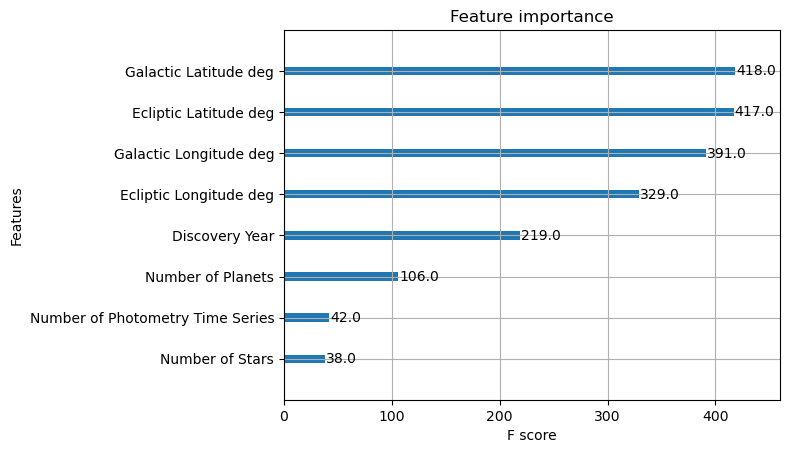

In [12]:
xgb.plot_importance(xgb_model_refined)
plt.show()

## F Score (weight) in this context represents the frequency in which a feature is used in the splits of the trees across the entire ensemble
### Frequency refers to the number of times a feature is used to split the data across all trees in the model
### Higher F score means a feature is used more frequently to create decision points (splits) in the trees, indicating the feature is considered important by the model

## Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

cv_scores_refined = cross_val_score(xgb_model_refined, x_train_clean, y_train, cv=5, scoring = 'accuracy')
roc_auc_scores_refined = cross_val_score(xgb_model_refined, x_train_clean, y_train, cv=5, scoring=make_scorer(roc_auc_score, needs_proba=True))

(f"Cross-Validation Accuracy Scores: {cv_scores_refined}"),(f"Mean CV Accuracy: {cv_scores_refined.mean()}"),(f"Cross-Validation ROC-AUC Scores: {roc_auc_scores_refined}"),(f"Mean CV ROC-AUC: {roc_auc_scores_refined.mean()}")

('Cross-Validation Accuracy Scores: [0.96990291 0.95825243 0.97184466 0.97084548 0.96890185]',
 'Mean CV Accuracy: 0.9679494655004859',
 'Cross-Validation ROC-AUC Scores: [0.9921161  0.9907663  0.99445745 0.99131118 0.99484715]',
 'Mean CV ROC-AUC: 0.9926996358339837')

## Accuracy Comparison:

### Refined model shows a slightly improved accuracy compared to the model with all features. Indicates that removing the less important features helped the model to generalize better to unseen data.

## ROC-AUC Score Comparison:

### The ROC-AUC score is higher for the refined model, suggesting better discrimination between the classes. This improvement reflects the model's enhanced ability to distinguish between exoplanets discovered through transits and those that are not.

## Precision, Recall, and F1-Score Comparison:

### Classification report reveals that the refined model has improved precision, recall, and F1-scores for one or both classes. This implies that the model's predictions are more balanced and accurate after feature refinement.

## Cross-validation Results:

### The CV results indicate that the refined XGBoost model has strong and consistent performance across different subsets of the data. The mean accuracy and ROC-AUC scores suggest that the model is robust and generalizes well to unseen data. Mean cross-validation accuracy of 96.79% and the mean cross-validation ROC-AUC score of 99.27% highlights the model's high predictive power and discriminative ability.